<a href="https://colab.research.google.com/github/viswanathareddy04/MachineLearning/blob/main/YoutubeAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import pandas as pd
from google.oauth2.credentials import Credentials
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [ ]:
def read_csv( csv_path):
    df = pd.read_csv(csv_path)
    return df

In [ ]:
def write_csv( df, csv_path):
    df.to_csv(csv_path, index=False)

In [ ]:
def get_video_details(video_id):
        # Call the YouTube API to get the video details
        try:
            url = f'https://www.googleapis.com/youtube/v3/videos?part=snippet,statistics,contentDetails&id={video_id}&key={api_key}'
            response = requests.get(url).json()
                        # Extract the desired details from the API response
            if 'items' not in response or len(response['items']) == 0:
              return None
                
            item = response['items'][0]
            if 'statistics' not in item or 'snippet' not in item or 'contentDetails' not in item:
                return None
            
            statistics = item['statistics']
            snippet = item['snippet']
            content_details = item['contentDetails']
            
            try:
                comment_response = requests.get(f'https://www.googleapis.com/youtube/v3/commentThreads?part=snippet&videoId={video_id}&key={api_key}').json()
                comments = [item['snippet']['topLevelComment']['snippet']['textDisplay'] for item in comment_response['items']]
            except KeyError:
                comments = []
            description = snippet.get('description', '')
            view_count = int(statistics.get('viewCount', 0))
            like_count = int(statistics.get('likeCount', 0))
            dislike_count = int(statistics.get('dislikeCount', 0)) if 'dislikeCount' in statistics else 0
            comment_count =  int(statistics.get('commentCount', 0))
            duration = content_details.get('duration', '')
            favorite_count = int(statistics.get('favoriteCount', 0))

            # Return a dictionary containing all the details
            return {
                'video_id': video_id,
                'comments': comments,
                'description': description,
                'view_count': view_count,
                'like_count': like_count,
                'dislike_count': dislike_count,
                'comment_count': comment_count,
                'duration': duration,
                'favorite_count': favorite_count
            }
        except HttpError as e:
            if e.resp.status == 403 and "commentsDisabled" in e.content:
                # Handle the scenario where comments are disabled for the video
                print(f"Comments are disabled for video {video_id}. Skipping to next video ID.")
                return None
            else:
                # Handle other errors
                print(f"An error occurred for video {video_id}: {e}")
                return None



In [ ]:
all_details = []
df = read_csv('vdoLinks.csv')
for video_id in df['youtubeId']:
    details = get_video_details(video_id)
    if details is not None:
        all_details.append(details)
df_details = pd.DataFrame(all_details, columns=['video_id','comments', 'description', 'view_count', 'like_count', 'dislike_count', 'comment_count', 'duration', 'favorite_count'])
write_csv(df_details, 'all_details.csv')

In [ ]:
df = read_csv('vdoLinks.csv')
df_details = df['youtubeId'].apply(get_video_details).dropna() # apply get_video_details to each youtubeId value
df_details = pd.DataFrame(df_details.tolist(), columns=['video_id','comments', 'description', 'view_count', 'like_count', 'dislike_count', 'comment_count', 'duration', 'favorite_count'])
df_details.to_csv('all_details.csv', index=False) # write df_details to a CSV file

In [ ]:
import pandas as pd

# Load the two datasets into pandas data frames
df1 = pd.read_csv('all_details.csv')
df2 = pd.read_csv('vdoLinks.csv')

# Merge the data frames based on the youtube_id column
merged_df = pd.merge(df1, df2, on='video_id', how='left')

# Save the merged data frame to a CSV file
merged_df.to_csv('merged_dataset.csv', index=False)
df_details = merged_df

In [ ]:
df_details.head()

,video_id,comments,description,view_count,like_count,dislike_count,comment_count,duration,favorite_count,movieId,title
0,K26_sDKnvMU,[],Trailer for Toy Story (1995) captured from the...,109930,120,0,0,PT1M31S,0,1.0,Toy Story (1995)
1,3LPANjHlPxo,[],Jumanji Trailer 1995\nDirector: Joe Johnston\n...,188018,280,0,0,PT2M48S,0,2.0,Jumanji (1995)
2,rEnOoWs3FuA,"['Buena película de comedia romántica', '<a hr...","The more things change, the more they stay the...",197719,218,0,13,PT1M52S,0,3.0,Grumpier Old Men (1995)
3,j9xml1CxgXI,[],Whitney Houston and Angela Bassett star in thi...,397174,0,0,0,PT2M40S,0,4.0,Waiting to Exhale (1995)
4,2GfZl4kuVNI,"['RIP Tom Sizemore', 'Hollywood have stopped m...","Director: Michael Mann.\nCast: Al Pacino, Robe...",1324021,7150,0,605,PT2M28S,0,6.0,Heat (1995)


In [ ]:
top10 = df_details.sort_values(by='view_count', ascending=False).head(10)
top10[['video_id', 'title', 'view_count']]


,video_id,title,view_count
4048,j-V12tL78Mc,Unfaithful (2002),124575170
1431,gv2AOQiGAwg,High Art (1998),19685025
2813,4FHpmn-KYec,Romeo and Juliet (1968),16040234
1313,2e-eXJ6HgkQ,Titanic (1997),13346267
4117,HTHJyw1UsLM,Like Mike (2002),13227566
1600,BBgghnQF6E4,Steamboat Willie (1928),12413849
2286,NJIjNs_s2NI,RoboCop 2 (1990),12150594
4214,AFma24S-Uvw,Secretary (2002),11616147
3015,lgo3Hb5vWLE,Requiem for a Dream (2000),8171854
4147,Spx-Mx3xhYY,xXx (2002),7900115


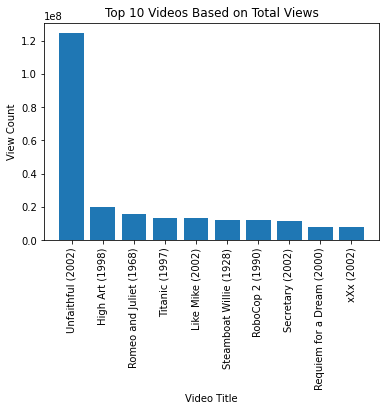

In [ ]:

titles = top10['title']
views = top10['view_count']

# Create a bar diagram
plt.bar(titles, views)
plt.xticks(rotation=90)
plt.xlabel('Video Title')
plt.ylabel('View Count')
plt.title('Top 10 Videos Based on Total Views')
plt.show()


In [ ]:
bottom10 = df_details.sort_values(by='view_count', ascending=True).head(10)
bottom10[['video_id', 'title', 'view_count']]


,video_id,title,view_count
899,q2lhPyHPMQc,Hear My Song (1991),0
591,w-XNlXCof08,"Man from Down Under, The (1943)",0
110,l25067DO9mo,Shadows (Cienie) (1988),0
2395,IzS2e9m5848,"End of the Affair, The (1955)",0
2447,l6vbZUvi2Qo,"Quarry, The (1998)",0
681,VezMra6h5C0,Shadow of Angels (Schatten der Engel) (1976),0
2699,9BOZDi9pijQ,Me Myself I (2000),0
3978,G_lozw5FkkU,"Rookie, The (2002)",0
518,uKdoP5nSZQM,Happy Weekend (1996),0
523,BVMWPRyM_nY,"Superweib, Das (1996)",0


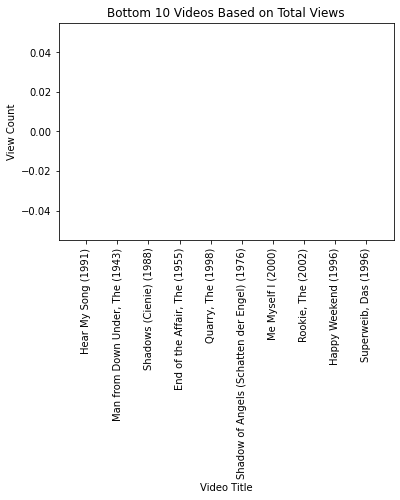

In [ ]:
titles = bottom10['title']
views = bottom10['view_count']

# Create a bar diagram
plt.bar(titles, views)
plt.xticks(rotation=90)
plt.xlabel('Video Title')
plt.ylabel('View Count')
plt.title('Bottom 10 Videos Based on Total Views')
plt.show()


In [ ]:
most_liked = df_details.sort_values(by='like_count', ascending=False).iloc[0]
most_liked[['video_id',  'title','like_count']]


video_id                  BBgghnQF6E4
title         Steamboat Willie (1928)
like_count                     114467
Name: 1600, dtype: object

In [ ]:
most_liked = df_details.sort_values(by='like_count', ascending=False).head(10)
most_liked[['video_id', 'title','like_count']]


,video_id,title,like_count
1600,BBgghnQF6E4,Steamboat Willie (1928),114467
2286,NJIjNs_s2NI,RoboCop 2 (1990),94243
2813,4FHpmn-KYec,Romeo and Juliet (1968),89329
4048,j-V12tL78Mc,Unfaithful (2002),69893
4117,HTHJyw1UsLM,Like Mike (2002),57685
2297,4OiMOHRDs14,Princess Mononoke (Mononoke-hime) (1997),47576
4267,4vPeTSRd580,Grave of the Fireflies (Hotaru no haka) (1988),46233
2718,BEq-wydAhdI,Third World Cop (1999),45610
4350,3EGojp4Hh6I,Harry Potter and the Chamber of Secrets (2002),36451
241,s7EdQ4FqbhY,Pulp Fiction (1994),32753


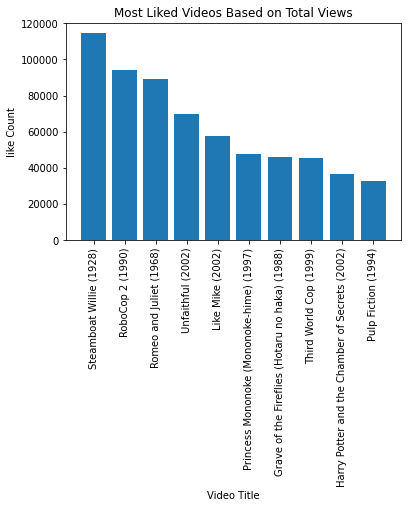

In [ ]:
titles = most_liked['title']
views = most_liked['like_count']

# Create a bar diagram
plt.bar(titles, views)
plt.xticks(rotation=90)
plt.xlabel('Video Title')
plt.ylabel('like Count')
plt.title('Most Liked Videos Based on Total Views')
plt.show()


In [ ]:
least_liked = df_details.sort_values(by='like_count', ascending=True).iloc[0]
least_liked[['video_id','title', 'like_count']]


video_id           An9oI16FPkY
title         Committed (2000)
like_count                   0
Name: 2732, dtype: object

In [ ]:
least_liked = df_details.sort_values(by='like_count', ascending=True).head(10)
least_liked[['video_id','title', 'like_count']]


,video_id,title,like_count
2732,An9oI16FPkY,Committed (2000),0
499,eFdzFhVa7QY,Loaded (1994),0
500,q4pIsTM3UZM,Bread and Chocolate (Pane e cioccolata) (1973),0
4077,-1H-jUBb8_0,"Diaries of Vaslav Nijinsky, The (2002)",0
3448,q9tcpBR-Fxs,Imagine: John Lennon (1988),0
3453,l4RpoT-Lps8,Masquerade (1988),0
1607,W6u4z-OqgSM,Graveyard Shift (Stephen King's Graveyard Shif...,0
508,PnmTi7hSjrA,Primal Fear (1996),0
4078,ZuYDAI0aaLo,"Sleepy Time Gal, The (2001)",0
1601,ssV611c5AMg,Tex (1982),0


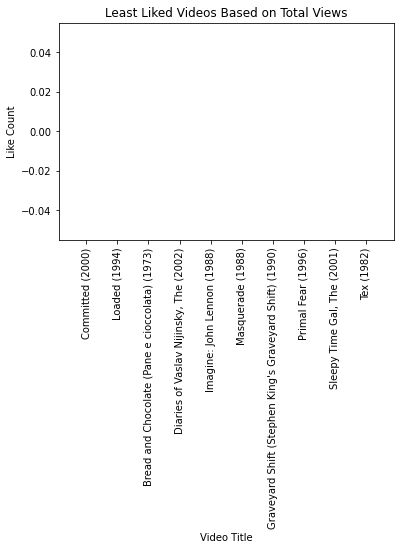

In [ ]:
titles = least_liked['title']
views = least_liked['like_count']

# Create a bar diagram
plt.bar(titles, views)
plt.xticks(rotation=90)
plt.xlabel('Video Title')
plt.ylabel('Like Count')
plt.title('Least Liked Videos Based on Total Views')
plt.show()


In [ ]:
highest_duration = df_details.sort_values(by='duration', key=lambda x: pd.to_timedelta(x)).iloc[-1]
highest_duration[['video_id','title' ,'duration']]


video_id         uwkfM-Gi7KU
title       Blackmail (1929)
duration          PT2H44M47S
Name: 1690, dtype: object

In [ ]:
highest_duration = df_details.sort_values(by='duration', key=lambda x: pd.to_timedelta(x), ascending=False).head(10)
highest_duration[['video_id','title', 'duration']]


,video_id,title,duration
1690,uwkfM-Gi7KU,Blackmail (1929),PT2H44M47S
461,XFs0LCnW-lM,Germinal (1993),PT2H31M47S
1086,6Df9-lp2QQE,Grateful Dead (1995),PT2H31M16S
3139,nDPMBDiwL0M,"Glass Menagerie, The (1987)",PT2H8M49S
3978,G_lozw5FkkU,"Rookie, The (2002)",PT2H8M
3236,SEh0zkOFmM4,Brigham City (2001),PT2H2S
4140,9BpC0NatYqU,Modesty Blaise (1966),PT1H58M53S
3589,RJc4I6pivqg,Marat/Sade (1966),PT1H58M8S
1167,VBZ_z7rYBkk,Love! Valour! Compassion! (1997),PT1H54M14S
614,8VFQ9qzRbgI,'Til There Was You (1997),PT1H54M7S


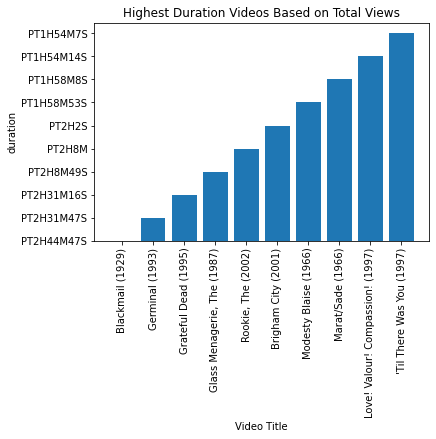

In [ ]:
titles = highest_duration['title']
views = highest_duration['duration']

# Create a bar diagram
plt.bar(titles, views)
plt.xticks(rotation=90)
plt.xlabel('Video Title')
plt.ylabel('duration')
plt.title('Highest Duration Videos Based on Total Views')
plt.show()


In [ ]:
import re
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
sid = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df_details = df_details[df_details['comments'].apply(lambda x: len(x) > 0)]
df_details

,video_id,comments,description,view_count,like_count,dislike_count,comment_count,duration,favorite_count,movieId,title
0,K26_sDKnvMU,[],Trailer for Toy Story (1995) captured from the...,109930,120,0,0,PT1M31S,0,1.0,Toy Story (1995)
1,3LPANjHlPxo,[],Jumanji Trailer 1995\nDirector: Joe Johnston\n...,188018,280,0,0,PT2M48S,0,2.0,Jumanji (1995)
2,rEnOoWs3FuA,"['Buena película de comedia romántica', '<a hr...","The more things change, the more they stay the...",197719,218,0,13,PT1M52S,0,3.0,Grumpier Old Men (1995)
3,j9xml1CxgXI,[],Whitney Houston and Angela Bassett star in thi...,397174,0,0,0,PT2M40S,0,4.0,Waiting to Exhale (1995)
4,2GfZl4kuVNI,"['RIP Tom Sizemore', 'Hollywood have stopped m...","Director: Michael Mann.\nCast: Al Pacino, Robe...",1324021,7150,0,605,PT2M28S,0,6.0,Heat (1995)
...,...,...,...,...,...,...,...,...,...,...,...
4406,NUYfDmeAgw8,[],Lewis Collins's thrilling 1982 SAS thriller se...,62926,208,0,52,PT2M34S,0,6149.0,"Final Option, The (Who Dares Wins) (1982)"
4407,v8y0YIQrhNw,[],Bronson as a homicide detective who goes outsi...,28760,0,0,0,PT2M16S,0,6168.0,10 to Midnight (1983)
4408,iqx5A93JfuI,[],Trailer for Charlie Chaplin's Last Movie,59348,49,0,6,PT1M22S,0,6172.0,"Countess from Hong Kong, A (1967)"
4409,2f64hh6k8jc,[],,39618,155,0,40,PT1M58S,0,6178.0,"Patch of Blue, A (1965)"


In [ ]:
comment = df_details['comments']
comment

0                                                      []
1                                                      []
2       ['Buena película de comedia romántica', '<a hr...
3                                                      []
4       ['RIP Tom Sizemore', 'Hollywood have stopped m...
                              ...                        
4406                                                   []
4407                                                   []
4408                                                   []
4409                                                   []
4410                                                   []
Name: comments, Length: 4411, dtype: object

In [ ]:
def preprocess_comments(comment_arr):
    processed_comments = []
    for comment in comment_arr:
        if isinstance(comment, str): 
            comment = comment.lower()
            comment = re.sub('[^a-zA-Z0-9\s]', '', comment)
            tokens = nltk.word_tokenize(comment)
            stop_words = nltk.corpus.stopwords.words('english')
            tokens = [token for token in tokens if token not in stop_words]
            comment = ' '.join(tokens)
            processed_comments.append(comment)
    return processed_comments

In [ ]:
df_details['comments'] = df_details['comments'].apply(lambda x: preprocess_comments(eval(x)) if isinstance(x, str) else [])
df_details = df_details[df_details['comments'].astype(bool)]

df_details['comments']

Series([], Name: comments, dtype: object)

In [ ]:
df_details = df_details[df_details['comments'] != '']

In [ ]:
def get_sentiment(comment_list):
    sentiment_scores = []
    for comment in comment_list:
        if isinstance(comment, str):
            score = sid.polarity_scores(comment)
            sentiment_scores.append(score['compound'])
    return sentiment_scores

In [ ]:
df_details['sentiment_score'] = df_details['comments'].apply(lambda x: get_sentiment(' '.join(x)) if isinstance(x, list) else [])
threshold = 0.5
df_details['sentiment'] = df_details['sentiment_score'].apply(lambda x: 'positive' if isinstance(x, list) and len(x) > 0 and max(x) > threshold else ('negative' if isinstance(x, list) and len(x) > 0 and min(x) < -threshold else 'neutral'))


In [ ]:
df_details

,video_id,comments,description,view_count,like_count,dislike_count,comment_count,duration,favorite_count,movieId,title,sentiment_score,sentiment
